In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [36]:
cal=pd.read_csv('calendar.csv')
cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [12]:
cal.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [14]:
cal.shape

(1393570, 4)

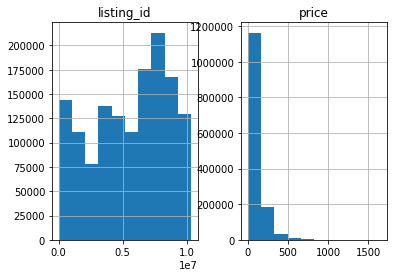

In [43]:
cal.hist();

In [19]:
cal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [37]:
#as we can see, price is a string here
#replacing non-numerical symbols from the price column
cal['price']=cal['price'].str.replace(',','')
cal['price']=cal['price'].str.replace('$','')
#converting string to float
cal['price']=cal['price'].astype(float)
cal.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [38]:
#converting string type date column to datetime type
cal['date'] = pd.to_datetime(cal['date'])
cal.dtypes

listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [27]:
cal.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [39]:
#imputing values with 0
cal=cal.fillna(0)
cal['monthy'] = cal['date'].dt.to_period('M')
cal

,listing_id,date,available,price,monthy
0,241032,2016-01-04,t,85.0,2016-01
1,241032,2016-01-05,t,85.0,2016-01
2,241032,2016-01-06,f,0.0,2016-01
3,241032,2016-01-07,f,0.0,2016-01
4,241032,2016-01-08,f,0.0,2016-01
5,241032,2016-01-09,f,0.0,2016-01
6,241032,2016-01-10,f,0.0,2016-01
7,241032,2016-01-11,f,0.0,2016-01
8,241032,2016-01-12,f,0.0,2016-01
9,241032,2016-01-13,t,85.0,2016-01


In [46]:
cal=pd.get_dummies(cal)
cal

,listing_id,date,price,monthy,available_f,available_t
0,241032,2016-01-04,85.0,2016-01,0,1
1,241032,2016-01-05,85.0,2016-01,0,1
2,241032,2016-01-06,0.0,2016-01,1,0
3,241032,2016-01-07,0.0,2016-01,1,0
4,241032,2016-01-08,0.0,2016-01,1,0
5,241032,2016-01-09,0.0,2016-01,1,0
6,241032,2016-01-10,0.0,2016-01,1,0
7,241032,2016-01-11,0.0,2016-01,1,0
8,241032,2016-01-12,0.0,2016-01,1,0
9,241032,2016-01-13,85.0,2016-01,0,1


In [48]:
ncal=cal.groupby(cal['monthy']).count()
ncal

,listing_id,date,price,available_f,available_t
monthy,,,,,
2016-01,106904,106904,106904,106904,106904
2016-02,110722,110722,110722,110722,110722
2016-03,118358,118358,118358,118358,118358
2016-04,114540,114540,114540,114540,114540
2016-05,118358,118358,118358,118358,118358
2016-06,114540,114540,114540,114540,114540
2016-07,118358,118358,118358,118358,118358
2016-08,118358,118358,118358,118358,118358
2016-09,114540,114540,114540,114540,114540


In [16]:
listings=pd.read_csv('listings.csv')
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [17]:
listings.shape

(3818, 92)

In [18]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [11]:
rev=pd.read_csv('reviews.csv')
rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
